In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import folium 

## wine around the world
In this notebook we going to explore the types of wine around the world, your clasifications, prices and etc. 

## Exploring the dataset

In [4]:
wine=pd.read_csv('data/winemag-data-130k-v2.csv')
wine.head()
# wine.iloc[:10,1:5]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


## validation

In [6]:
(
    wine
    .isnull()
    .sum()
    
    
    
    
)

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
(
    wine.drop([
    'region_2',
    'taster_twitter_handle'],
    axis=1,inplace=True

    )
)

In [8]:
wine

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


## Deleteing null values

In [9]:
(
    wine.dropna(inplace=True)
)

In [10]:
(
    wine
)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
...,...,...,...,...,...,...,...,...,...,...,...,...
129959,129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,Roger Voss,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129962,129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


## set style 

In [11]:
sns.set_style('whitegrid')


## distribuetions of the points 

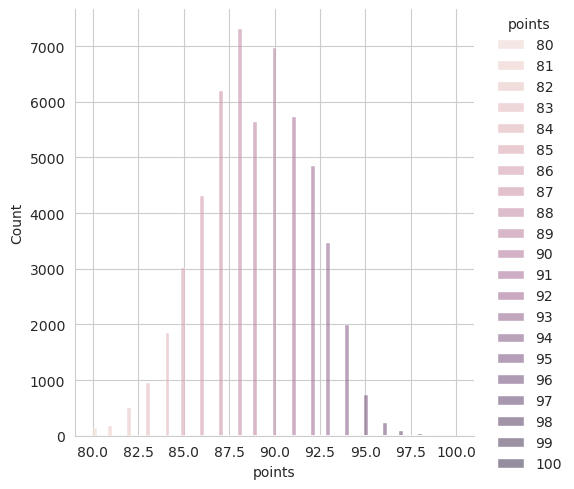

In [12]:
(
    sns.displot(
    data= wine,
    
    x= 'points',
    hue='points'
    )
);

## Measures of dispersion


In [13]:
(
    wine.points.min(),
    wine.points.mean(),
    wine.points.max(),
    wine.points.median(),
    wine.points.mode()                                           
)


(80,
 88.96654975078457,
 100,
 89.0,
 0    88
 Name: points, dtype: int64)

In [14]:
(
    wine.price.min(),
    wine.price.mean(),
    wine.price.max(),
    wine.price.median(),
    wine.price.mode() 
)

(4.0,
 39.209340963633004,
 2013.0,
 30.0,
 0    20.0
 Name: price, dtype: float64)

## Relplot prices vs points 

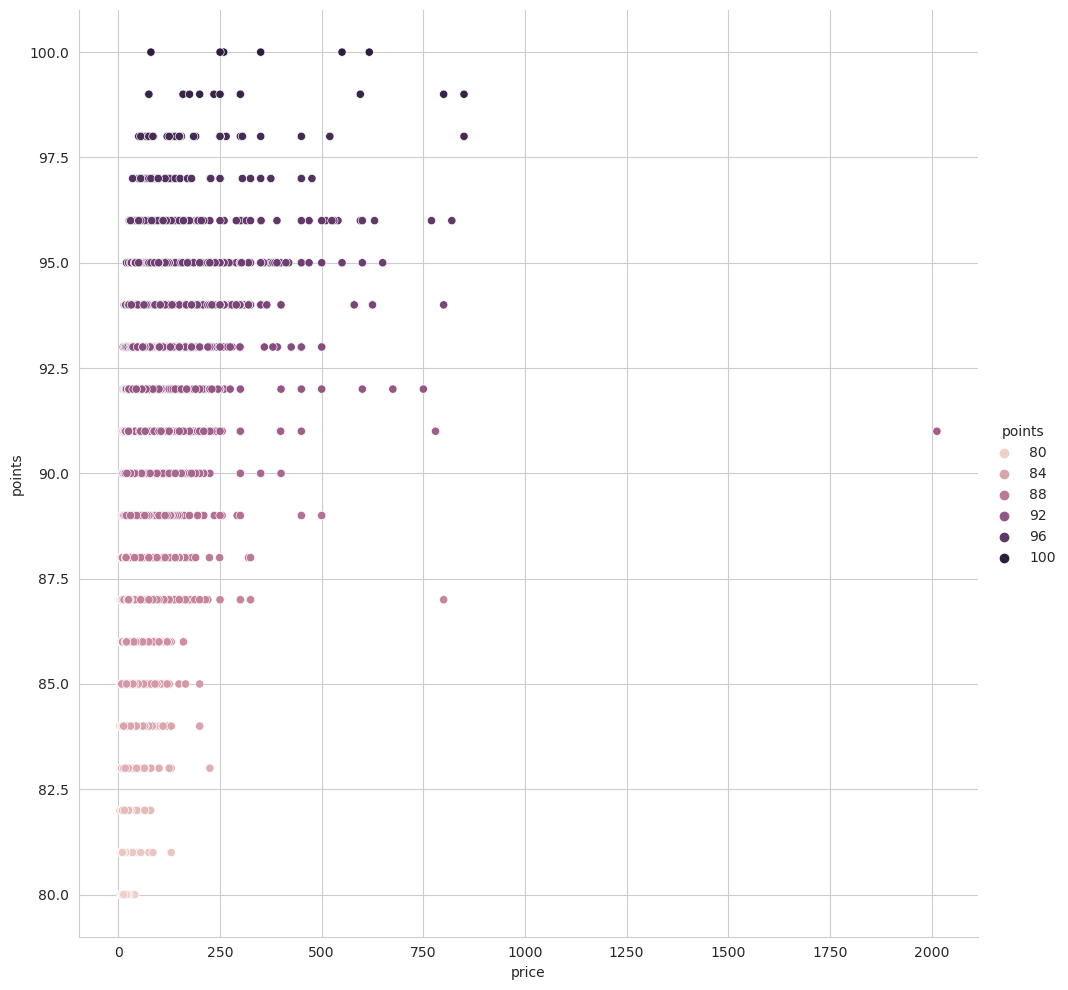

In [15]:
(
    sns.relplot(
    data=wine,
    x='price',
    y='points',
    hue='points',
    height= 10
    )
);

# Which are the most important wine producer?

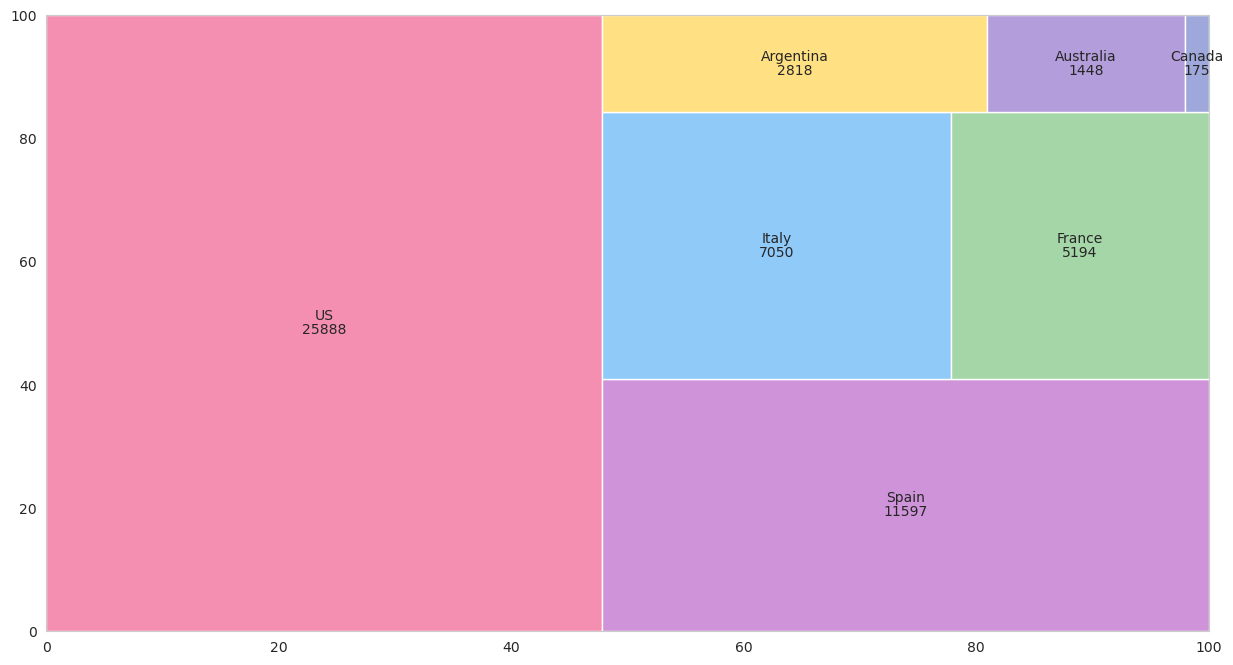

In [16]:
(
    plt.figure(figsize=(15, 8)),
    squarify.plot(
    wine.country.value_counts(),
    label= wine.country.unique(),
    color=["#F48FB1", "#CE93D8", "#90CAF9", "#A5D6A7", "#FFE082","#B39DDB","#9FA8DA"],
    value= wine.country.value_counts(),
    pad= 0.
    
                    
    )
);

## which are the best wine como from ?

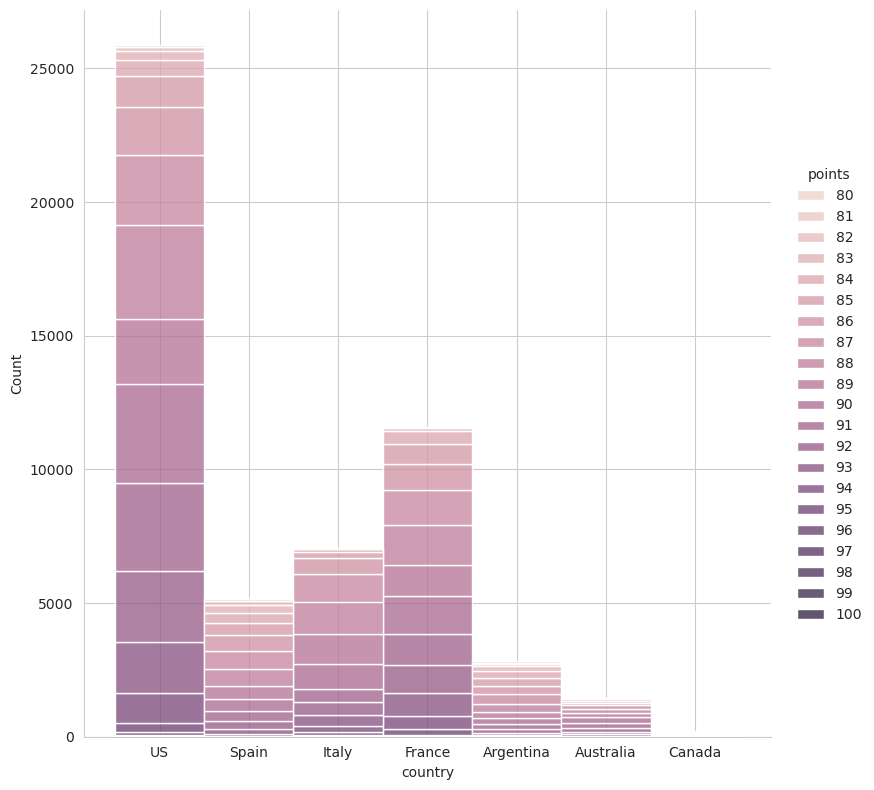

In [17]:

(
    sns.displot(
    data=wine,
    x='country',
    hue='points',
    height=8,
    multiple='stack'
    )
);

In [18]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [19]:

    wine['category'] = pd.cut( #creando una nuevo columna con la categoria de los vinos en tipo brinitanico 
    wine['points'],
    bins=[80,85,90,95,101],
    labels=['D','C','B','A'])

In [20]:
wine['points'].max()

100

In [21]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,category
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,C
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,C
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,C
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,C
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,C


## category distribution by country

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


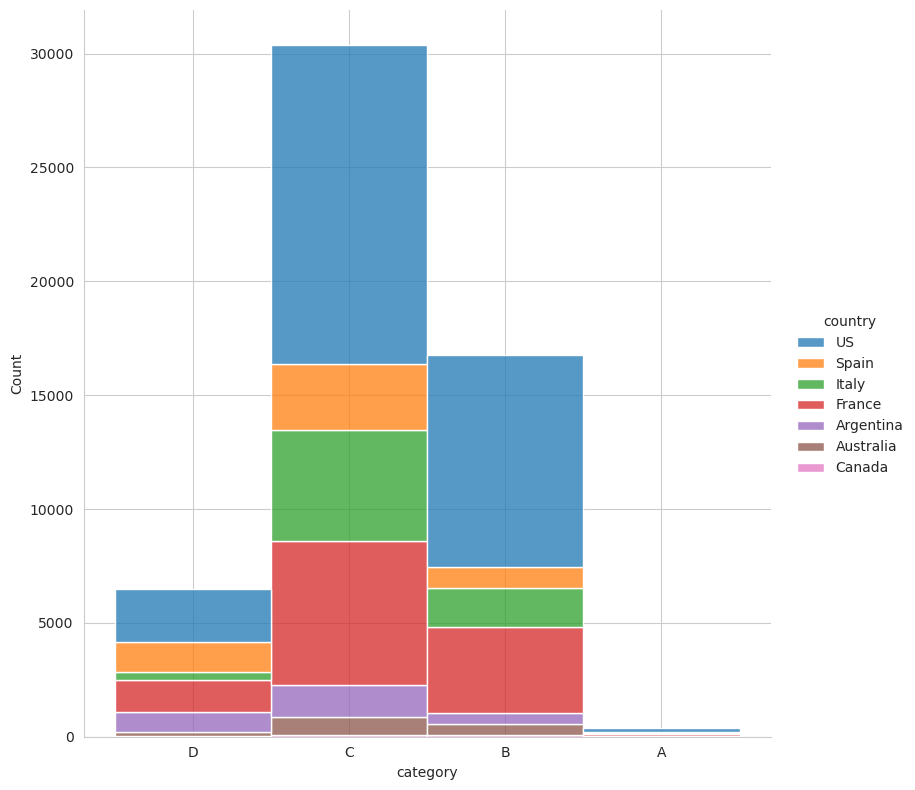

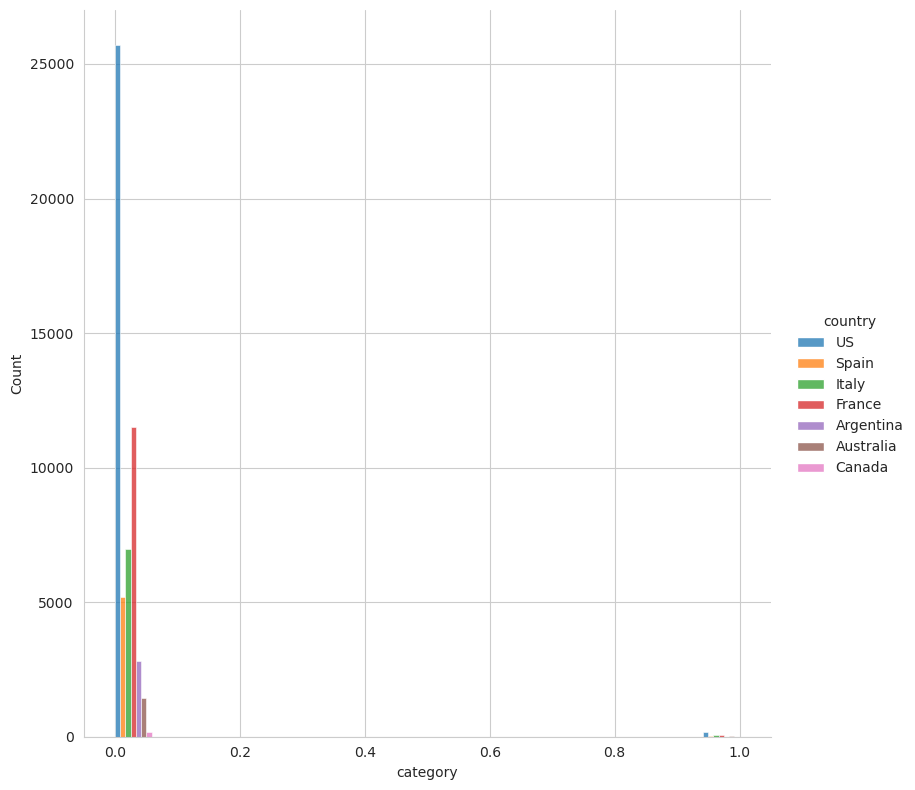

In [22]:
# fig, axes = plt.subplots(figsize=(8,12))
    
sns.displot(
    data= wine,
    x='category',
    hue='country',
    multiple='stack',
    height=8
    );

(   
    sns.displot(
    data= wine,
    x= wine.category=='A',
    hue='country',
    multiple='dodge',
    height=8

    )
);

## Price mean by category

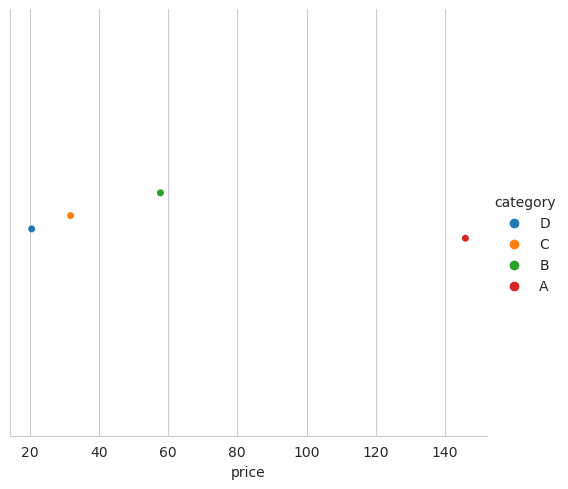

In [23]:
(
    sns.catplot(
    data=wine.groupby(['category']).mean(),
    x='price',
    hue='category'
    
    )
);

In [24]:
wine

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,category
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,C
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,C
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,C
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,C
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129959,129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,Roger Voss,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim,C
129962,129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano,C
129965,129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,C
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,C


In [25]:
(
    wine.price.min(),
    wine.price.mean(),
    wine.price.median(),
    wine.price.max(),
    wine.price.mode(),
    wine.price.std(),
    wine.price.quantile([0.25,0.75]) 
)


(4.0,
 39.209340963633004,
 30.0,
 2013.0,
 0    20.0
 Name: price, dtype: float64,
 36.15407596129577,
 0.25    20.0
 0.75    48.0
 Name: price, dtype: float64)

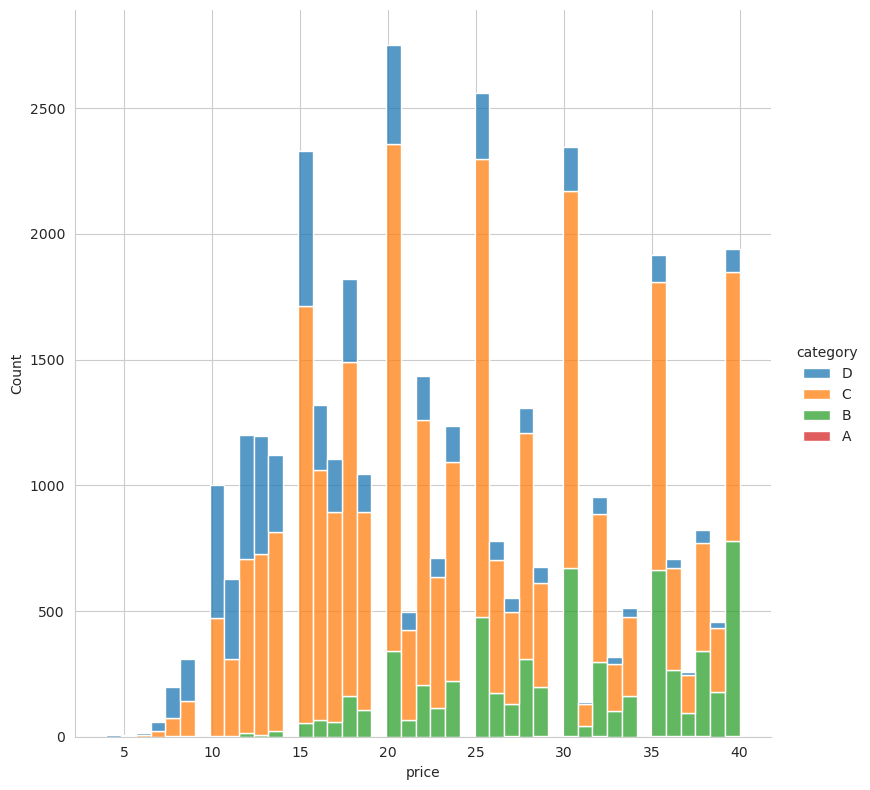

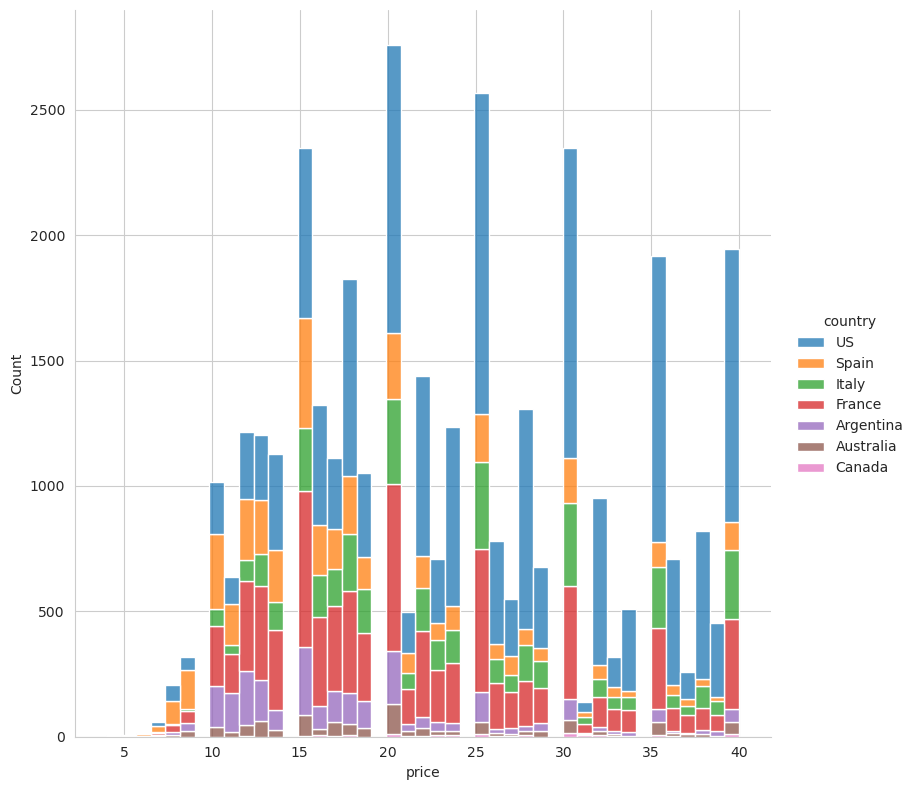

In [26]:
(
    sns.displot(
    data= wine[wine['price']<=40],
    x='price',
    hue='category',
    height=8,
    multiple= 'stack'

    ),
    (
    sns.displot(
    data= wine[wine['price']<=40],
    x='price',
    hue='country',
    height=8,
    multiple= 'stack'

    )
)
);

## wine category A under 40 usd 

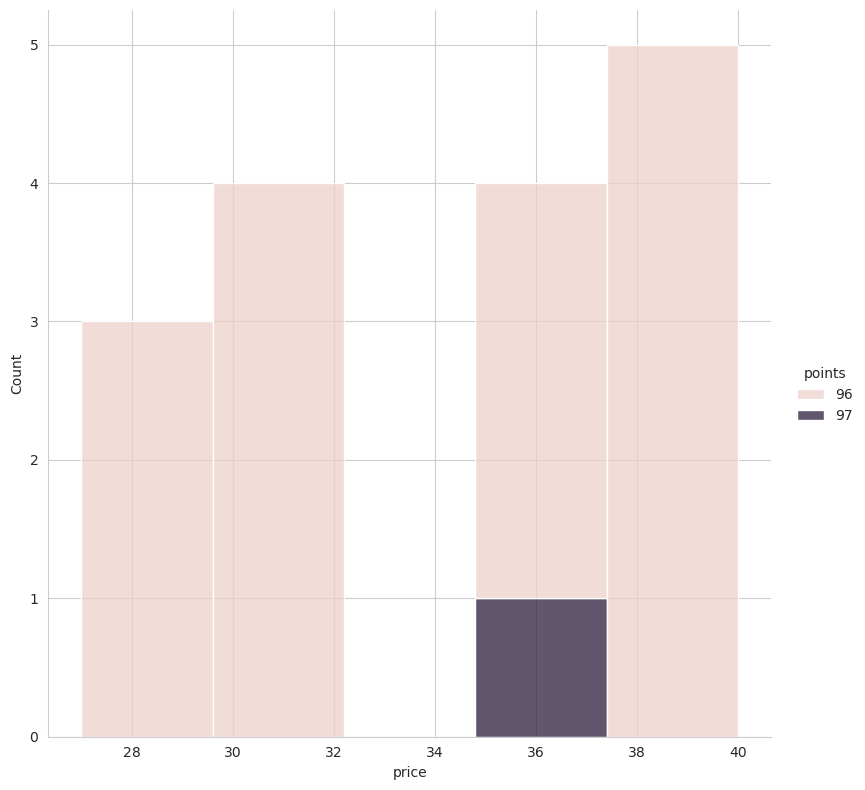

In [27]:
x=wine[wine['price']<=40]
x[x['category']== 'A'].count()
(
    sns.displot(
    data=x[x['category']== 'A'],
    x='price',
    hue='points',
    height=8,
    multiple= 'stack'
    )
);

In [28]:
wineA=wine[wine['category'] == 'A']
(
    wineA.price.mean(),
    wineA.price.mode(),
    wineA.price.median(),
    wineA.price.min(),
    wineA.price.max(),
    wineA.price.std(),
    wineA.price.quantile([0.25,0.75])
)



(145.92307692307693,
 0    100.0
 Name: price, dtype: float64,
 96.5,
 27.0,
 850.0,
 139.60964712609135,
 0.25     68.0
 0.75    150.0
 Name: price, dtype: float64)

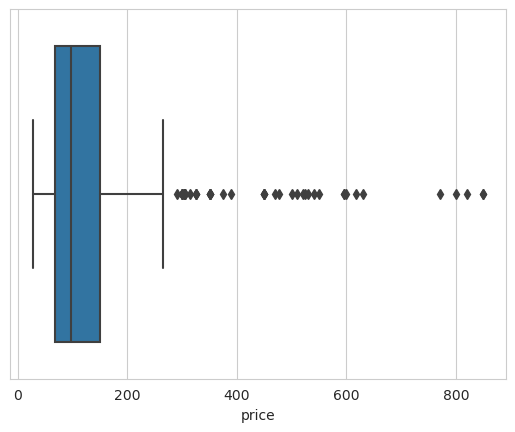

In [29]:
(
    sns.boxplot(
    data= wineA,
    x='price'
    )
);

In [30]:
wineA.count()

Unnamed: 0     364
country        364
description    364
designation    364
points         364
price          364
province       364
region_1       364
taster_name    364
title          364
variety        364
winery         364
category       364
dtype: int64

In [31]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,category
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,C
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,C
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,C
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,C
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,C


## variety

In [33]:
(
    wine['variety'].nunique(),
    wine['winery'].nunique(),
    wine['taster_name'].nunique(),
    wine['winery'].nunique()


)


(434, 8583, 17, 8583)

In [69]:
wine.reset_index(inplace= True)


ValueError: cannot insert level_0, already exists

In [70]:
wine.drop(['level_0','index', 'Unnamed: 0'],axis=1,inplace= True)

In [71]:
wine

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,category
0,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,C
1,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,C
2,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,C
3,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,C
4,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,C
...,...,...,...,...,...,...,...,...,...,...,...,...
54165,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,Roger Voss,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim,C
54166,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano,C
54167,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,C
54168,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,C


In [147]:

wine.variety.value_counts(normalize= True)[:20]

Pinot Noir                  0.124349
Chardonnay                  0.091121
Red Blend                   0.087964
Cabernet Sauvignon          0.057467
Bordeaux-style Red Blend    0.041111
Syrah                       0.036625
Riesling                    0.034299
Rosé                        0.033044
Malbec                      0.032693
Sparkling Blend             0.026509
Sauvignon Blanc             0.025734
Nebbiolo                    0.025605
Tempranillo                 0.025586
Zinfandel                   0.022042
White Blend                 0.021322
Champagne Blend             0.019734
Rhône-style Red Blend       0.018590
Sangiovese                  0.018091
Merlot                      0.016116
Pinot Gris                  0.012092
Name: variety, dtype: float64

In [148]:
wine.variety.value_counts(normalize= True)[:20].sum()


0.7700941480524276

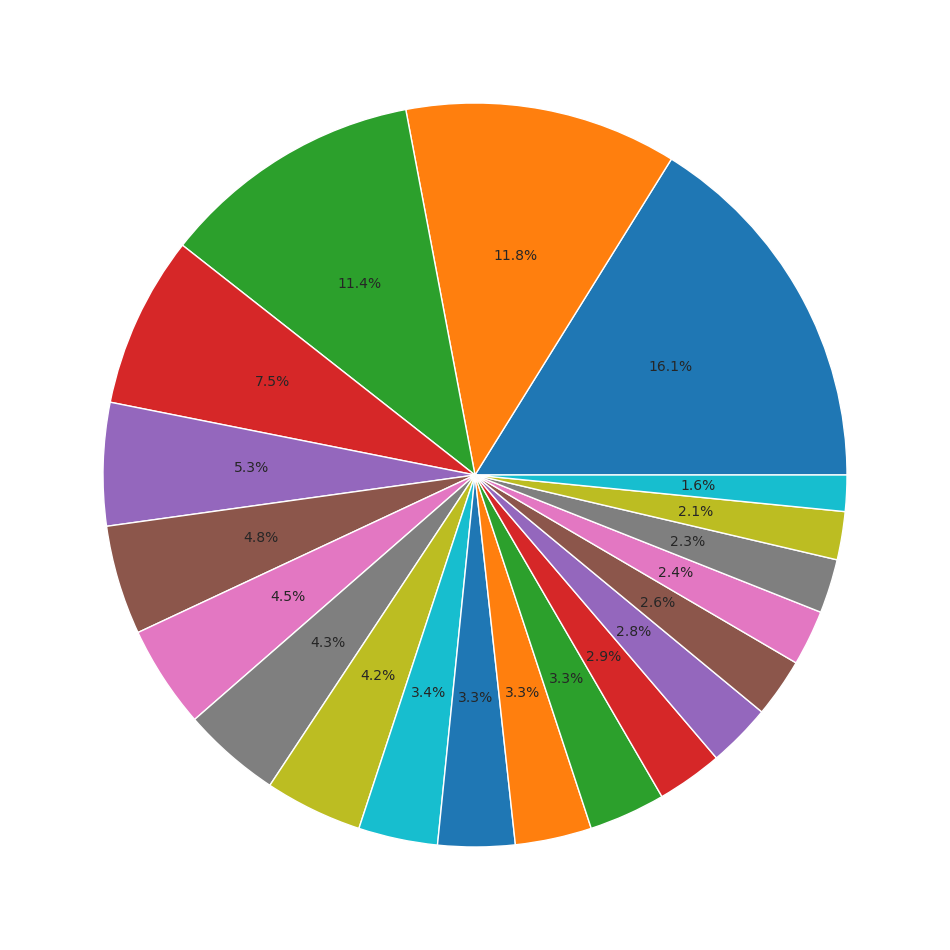

In [141]:
fig, axes = plt.subplots(figsize =(12,14))
axes.pie( wine.variety.value_counts(normalize= True)[0:20], autopct='%1.1f%%');




In [59]:
wine.variety.unique()
wine.variety.sort_values()

45401      Abouriou
98235      Abouriou
61051     Aglianico
119353    Aglianico
61039     Aglianico
            ...    
108851     Zweigelt
102282     Zweigelt
55345      Zweigelt
50410      Zweigelt
59461      Zweigelt
Name: variety, Length: 54170, dtype: object

In [34]:
folium.Map(location=[wine.country,wine.province], zoom_start=9)

ValueError: Location should consist of two numerical values, but 3             US
4             US
5          Spain
6          Italy
9         France
           ...  
129959    France
129962     Italy
129965    France
129968    France
129970    France
Name: country, Length: 54170, dtype: object of type <class 'pandas.core.series.Series'> is not convertible to float.

In [ ]:
wine.country

3             US
4             US
5          Spain
6          Italy
9         France
           ...  
129959    France
129962     Italy
129965    France
129968    France
129970    France
Name: country, Length: 54170, dtype: object